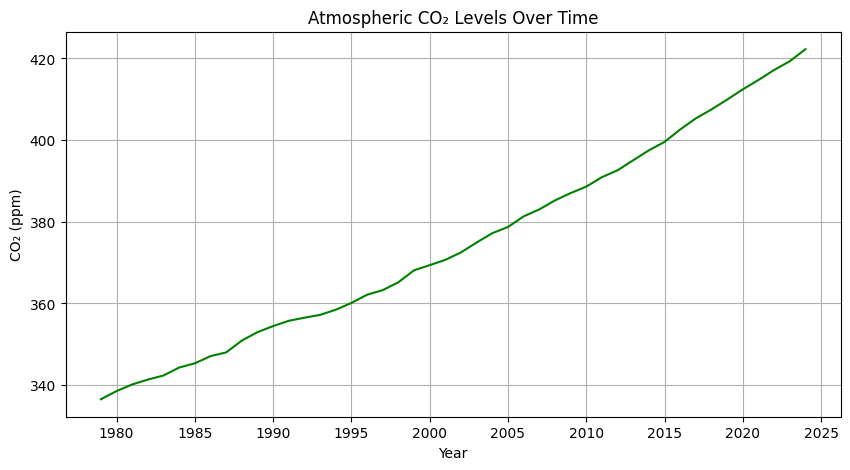

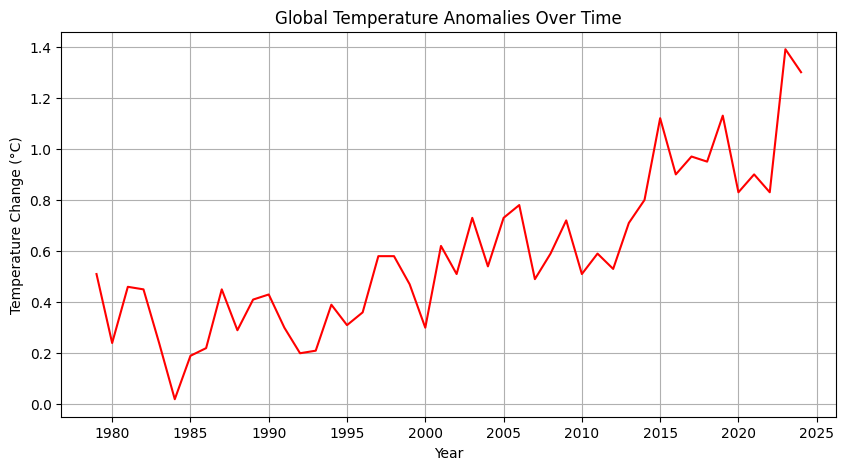

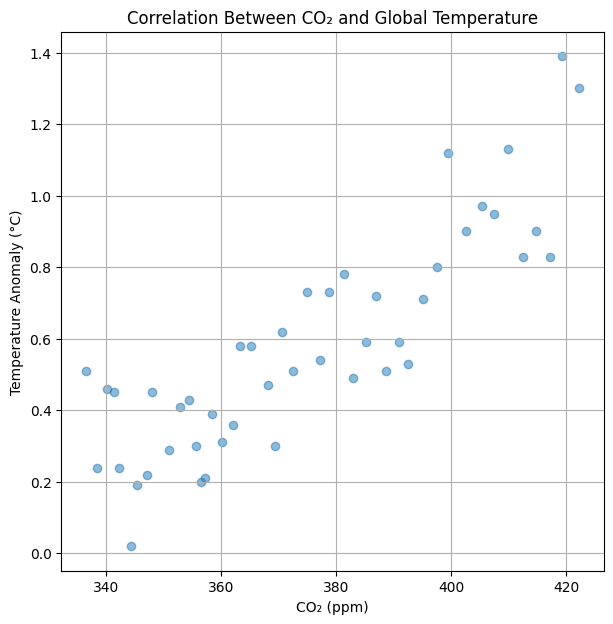

Correlation: 0.8609593113100015


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

co2 = pd.read_csv("co2.long.csv")
# Rename the second column in co2 to 'CO2'
co2.rename(columns={co2.columns[1]: 'CO2'}, inplace=True)
co2['Date'] = pd.to_datetime(co2['Date'])

# Read temp, skipping metadata rows and using comma as separator
temp = pd.read_csv("data.csv", sep=',', skiprows=3)
# Create a 'Date' column from 'Year' and convert 'Anomaly' to 'TempAnomaly'
temp['Date'] = pd.to_datetime(temp['Year'], format='%Y')
temp.rename(columns={'Anomaly': 'TempAnomaly'}, inplace=True)

data = pd.merge(co2, temp, on='Date', how='inner')

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['CO2'], color='green')
plt.title("Atmospheric CO₂ Levels Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['TempAnomaly'], color='red')
plt.title("Global Temperature Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(data['CO2'], data['TempAnomaly'], alpha=0.5)
plt.title("Correlation Between CO₂ and Global Temperature")
plt.xlabel("CO₂ (ppm)")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.show()

correlation = data['CO2'].corr(data['TempAnomaly'])
print("Correlation:", correlation)